## At the top right, make sure you select the right kernal, it might no start the right kernel directly

In [1]:
from operator import attrgetter

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
from notify_run import Notify
import igraph
from collections import Counter
from matplotlib.colors import LogNorm
sns.reset_defaults()
sns.set_theme(style="darkgrid")
sns.set_palette("colorblind")

In [2]:
notify = Notify()
# notify.register()
renames = {'linear_ranking':'LR', 
           'mulambda':r'$(\mu,\lambda)$', 
           'original':'seminal', 
           'mupluslambda':'seminal',
           'roulette_wheel': 'RWS',
           'single_elitist_rws':'E-RWS', 
           'tour_elite': 'E-TOS',
           'single_elitist_tournament': 'E-TOS',
           'tour_no_replace':'TOS -R',
           'no_replacement_tournament': 'TOS -R',
           'tournament':'TOS +R'}


In [3]:
#verry important
os.chdir(r"C:/Users/nieli/Documents/uva/thesis/code/")
print(os.getcwd())

C:\Users\nieli\Documents\uva\thesis\code


### This is for n-d functions with optimum 0, new

In [4]:
df = pd.DataFrame(columns=['run_n', 'benchmark','selection_method','best_final_objval','best_objval','theoretical_optimum','dimensions'])

directory = 'PPA/results/results-2021-06-03_18-58-27/'
i = 0
for filename in os.listdir(directory):
    i+=1
    if i%500 == 0:
        print(f'total of {i/500*500} files read')
    file = pickle.load(open(directory+filename,"rb"))

    
    df = df.append({
        'run_n':file.run_n,
        'benchmark':file.benchmark_name, 
        'selection_method':file.survivor_selection_name,
        'best_final_objval': min(individual.objective_value for individual in file.parent_population), #this is the best object value at the end of the run
        'best_objval': file.best_objval_during_run.objective_value,   #this is the best obj value recorded during the run
        'theoretical_optimum': file.benchmark_optimum,
        'dimensions': file.benchmark_dimensions,
        'diplay_name': f"{file.benchmark_name}-{file.benchmark_dimensions:03d}D"
    }, ignore_index=True)
df.loc[df['selection_method'] == 'single_elitist_tournament','selection_method'] = 'tour_elite'
df.loc[df['selection_method'] == 'no_replacement_tournament','selection_method'] = 'tour_no_replace'
df.loc[df['selection_method'] == 'mupluslambda','selection_method'] = 'original'
df['error'] = abs(df['best_objval'] - df['theoretical_optimum'])
# df['benchmark'] = df.benchmark.str.replace("20", "d").str.replace("100", "f").str.replace("2", "a").str.replace("50", "e").str.replace("5", "b").str.replace("10", "c")

df = df.sort_values(by="benchmark")
df = df.astype({'theoretical_optimum':float,'error':float})
notify.send('Done reading all files')

total of 500.0 files read
total of 1000.0 files read
total of 1500.0 files read
total of 2000.0 files read
total of 2500.0 files read
total of 3000.0 files read
total of 3500.0 files read
total of 4000.0 files read
total of 4500.0 files read


In [5]:
df = df.replace({"selection_method": renames})
df_2d = df[~df['benchmark'].isin(['Ackley', 'Rosenbrock', 'Griewank', 'Rastrigrin', 'Schwefel', 'Ellipse', 'Cigar', 'Tablet',
                    'Sphere'])]
df_nd = df[df['benchmark'].isin(['Ackley', 'Rosenbrock', 'Griewank', 'Rastrigrin', 'Schwefel', 'Ellipse', 'Cigar', 'Tablet',
                    'Sphere'])]
df_2d = df_2d.sort_values(by=['benchmark','dimensions']).reset_index()
df_nd = df_nd.sort_values(by=['benchmark','dimensions']).reset_index()

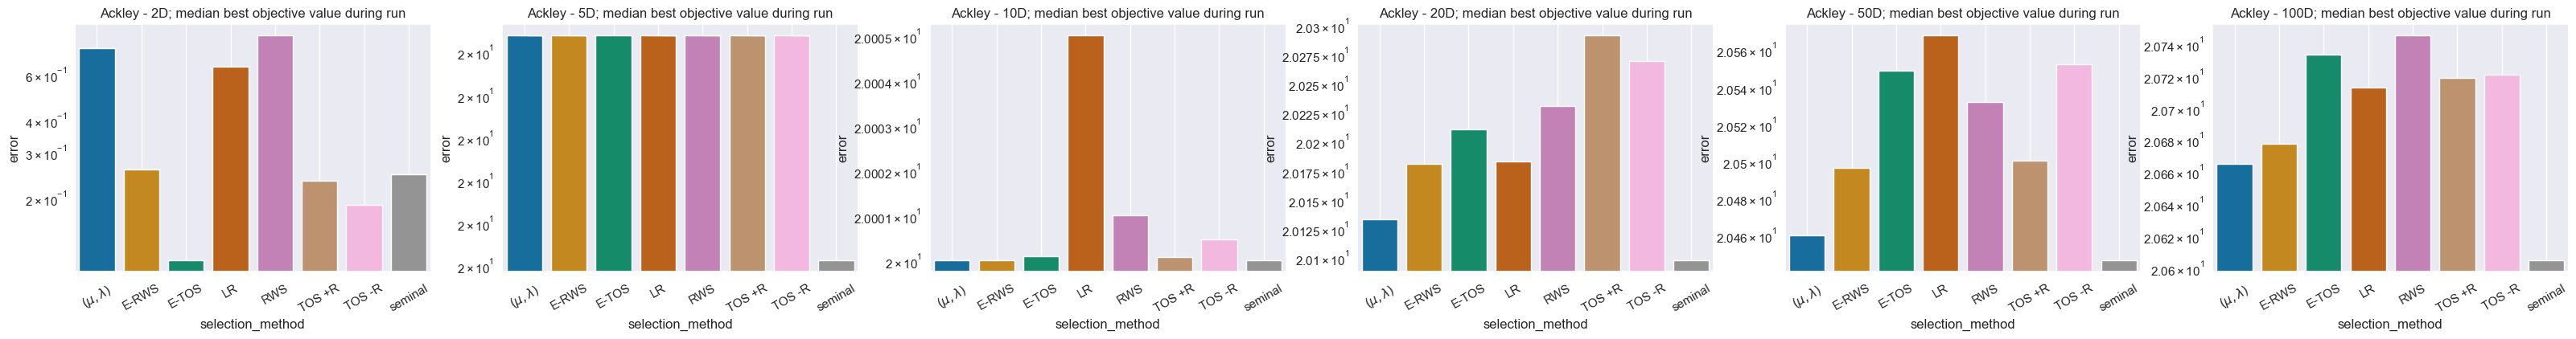

<Figure size 640x480 with 0 Axes>

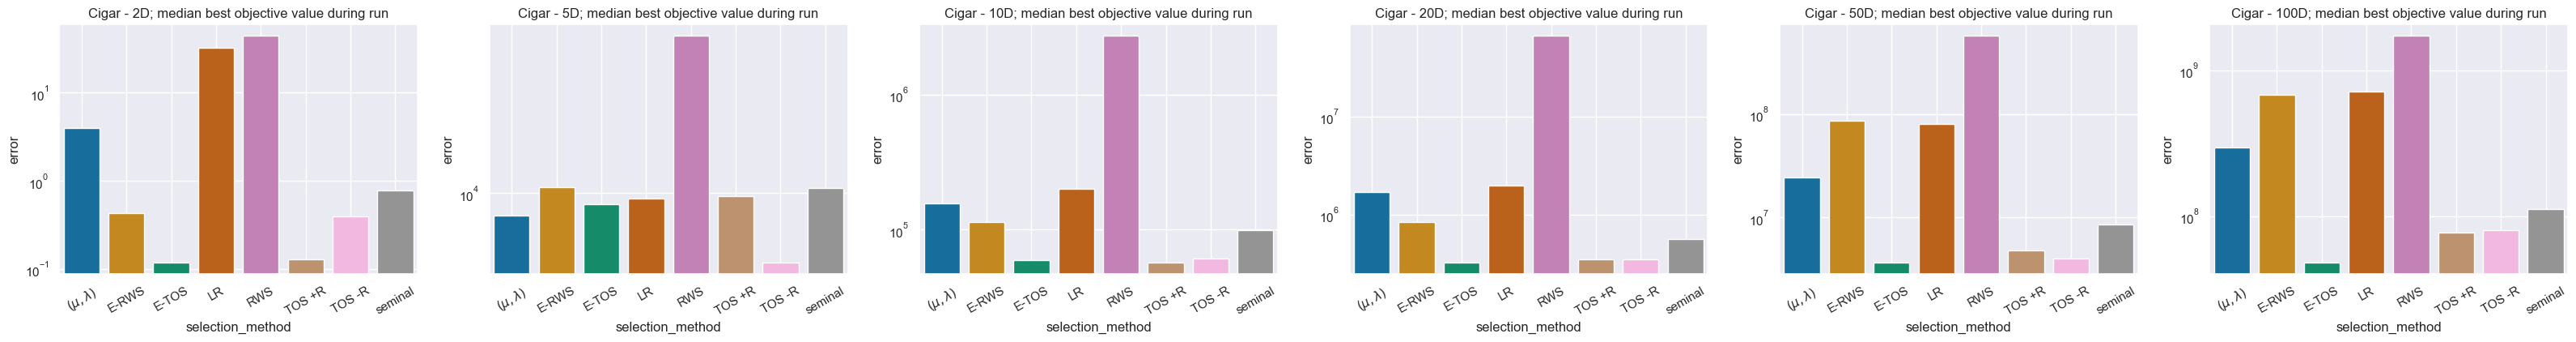

<Figure size 640x480 with 0 Axes>

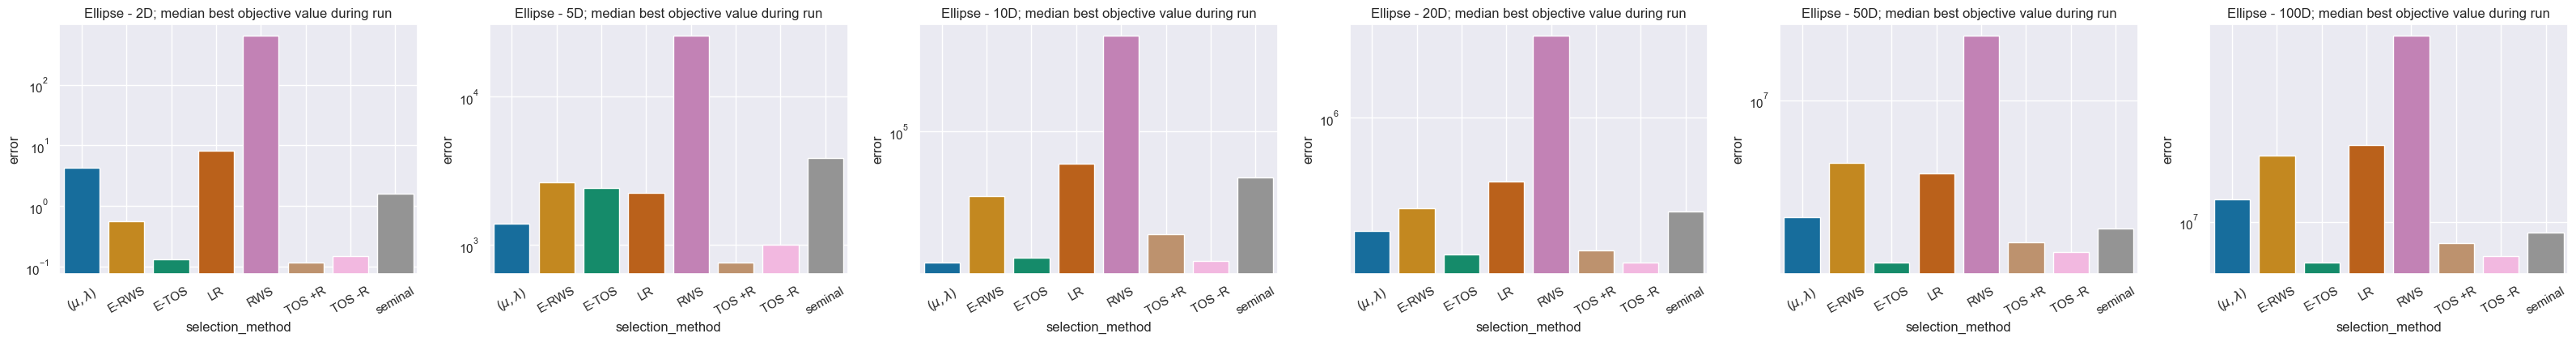

<Figure size 640x480 with 0 Axes>

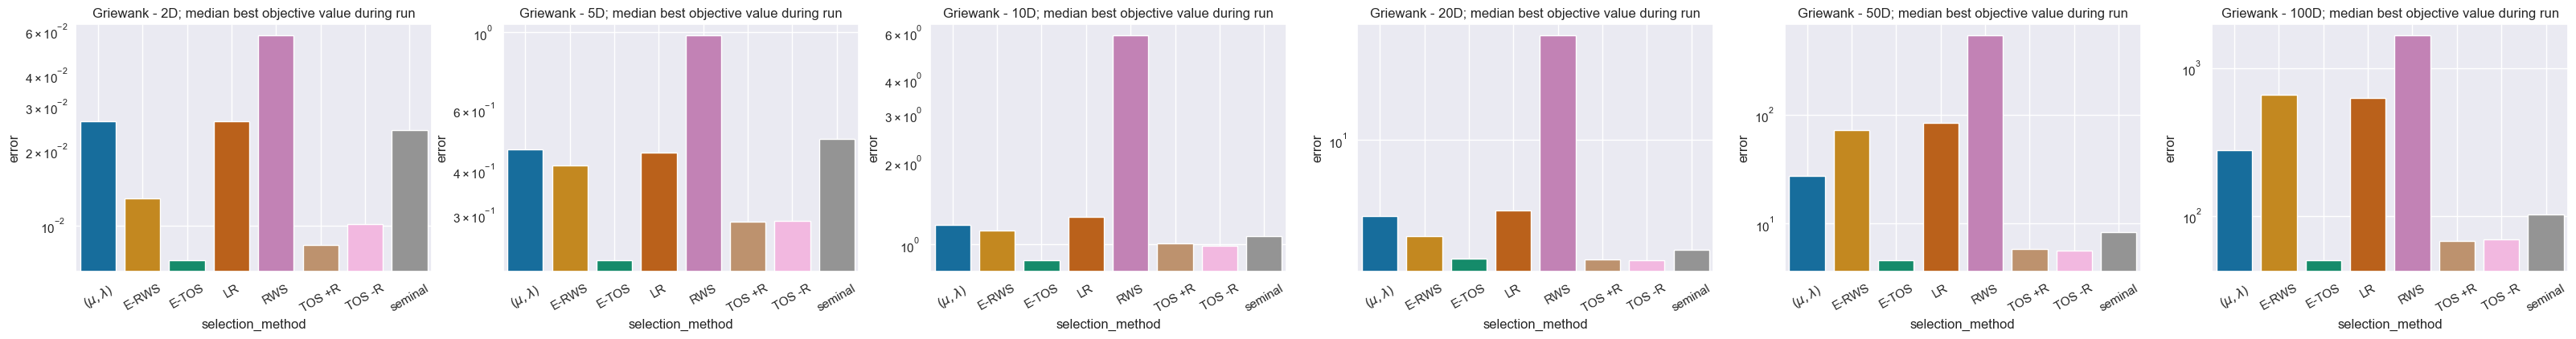

<Figure size 640x480 with 0 Axes>

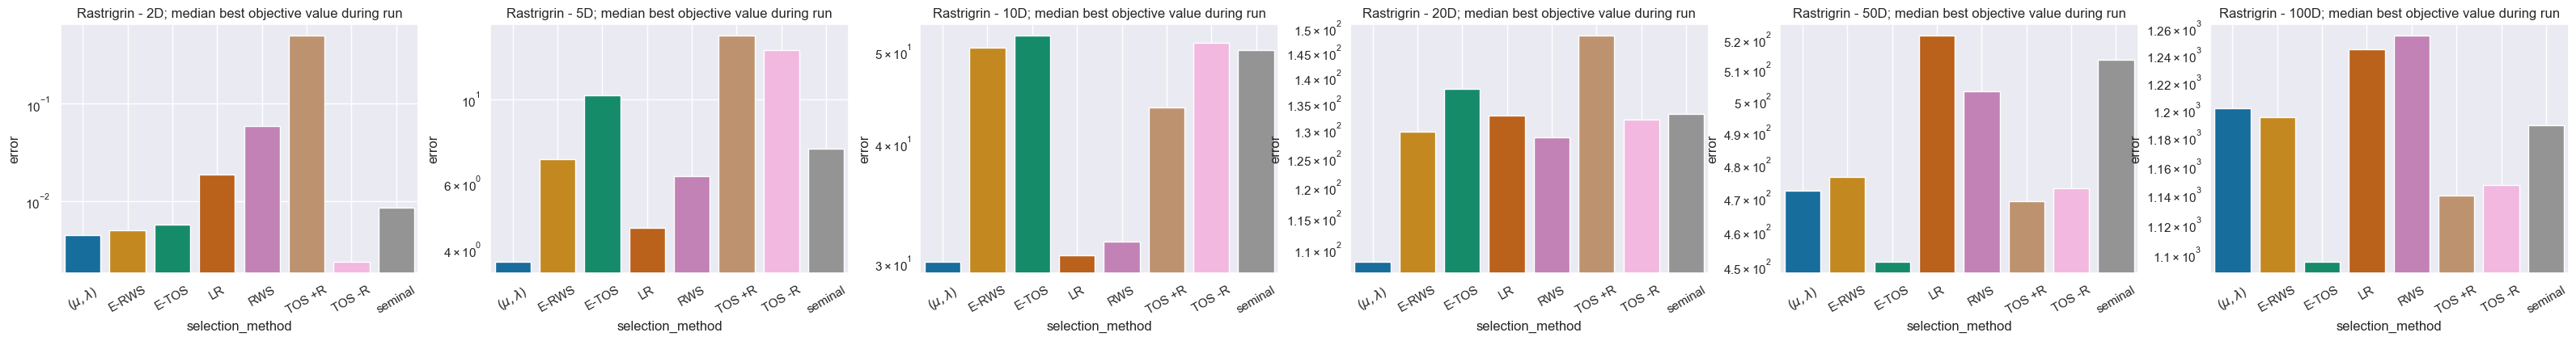

<Figure size 640x480 with 0 Axes>

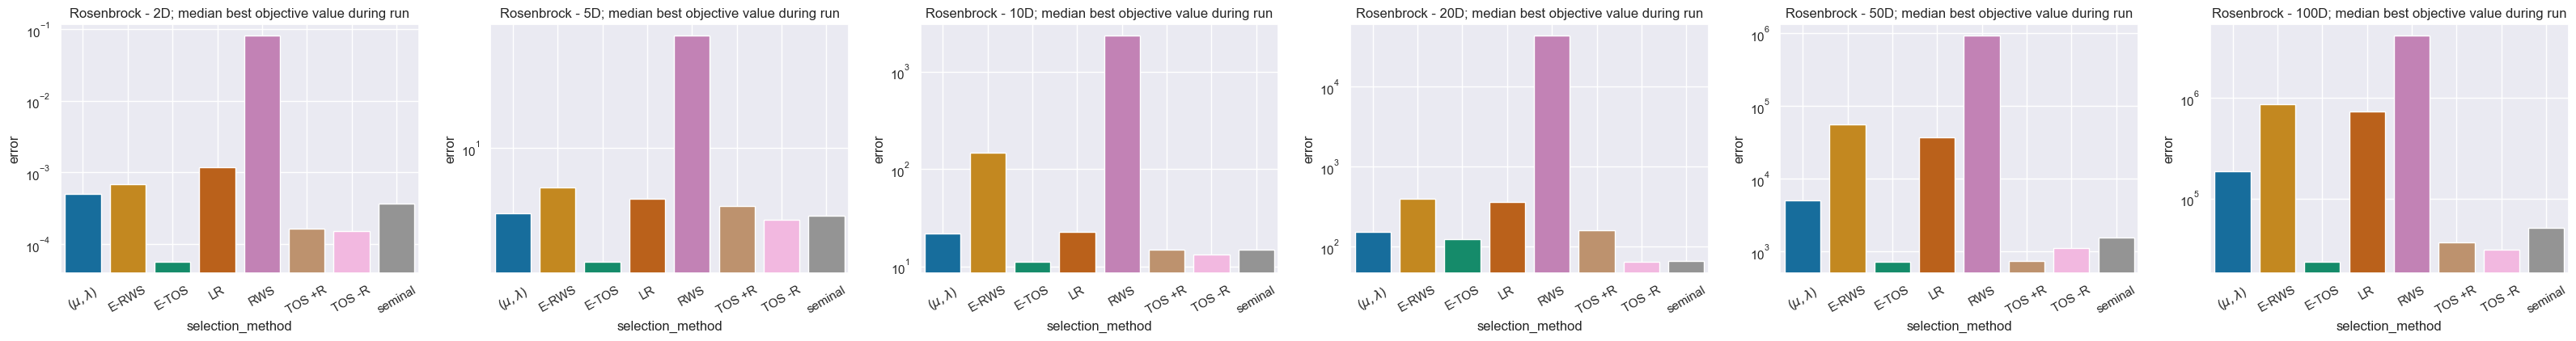

<Figure size 640x480 with 0 Axes>

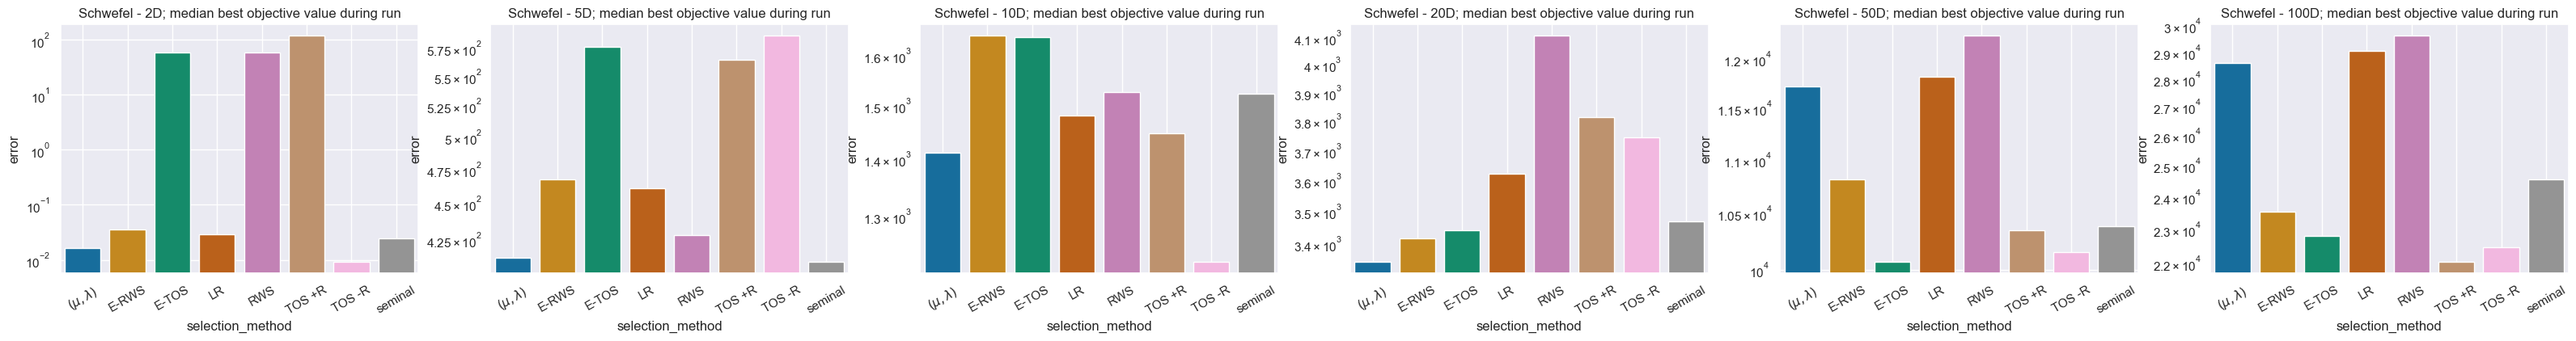

<Figure size 640x480 with 0 Axes>

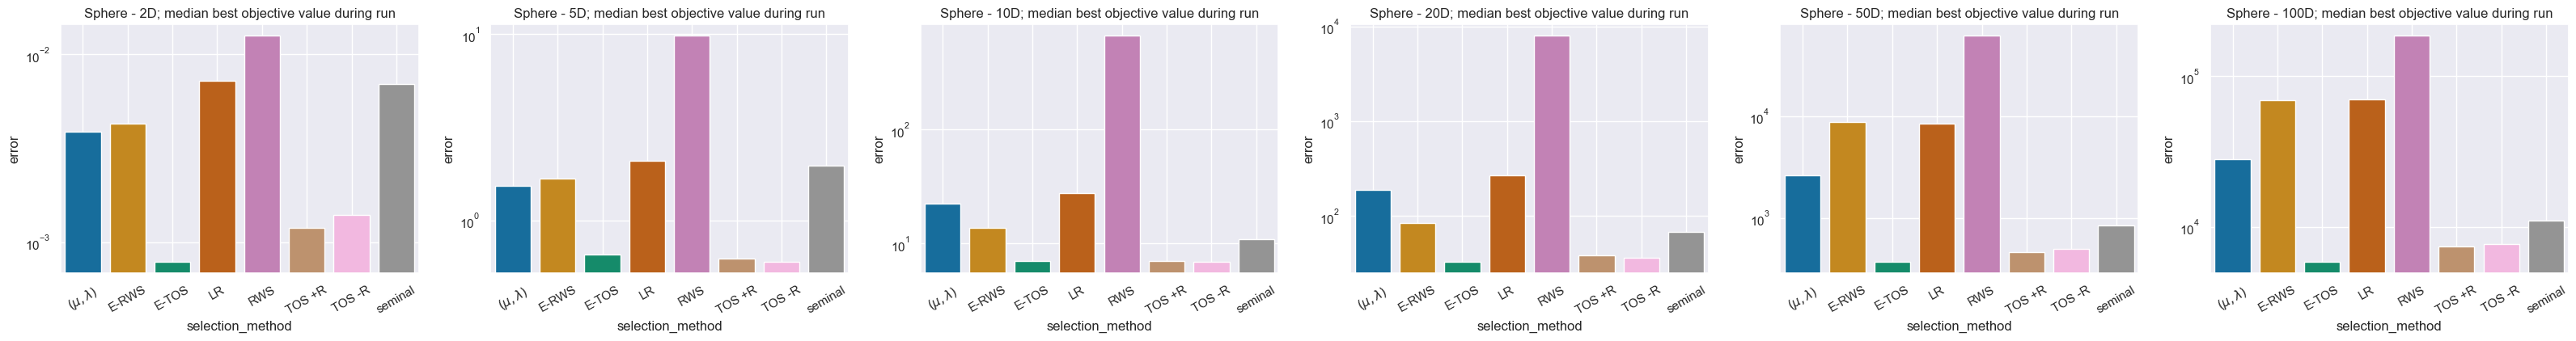

<Figure size 640x480 with 0 Axes>

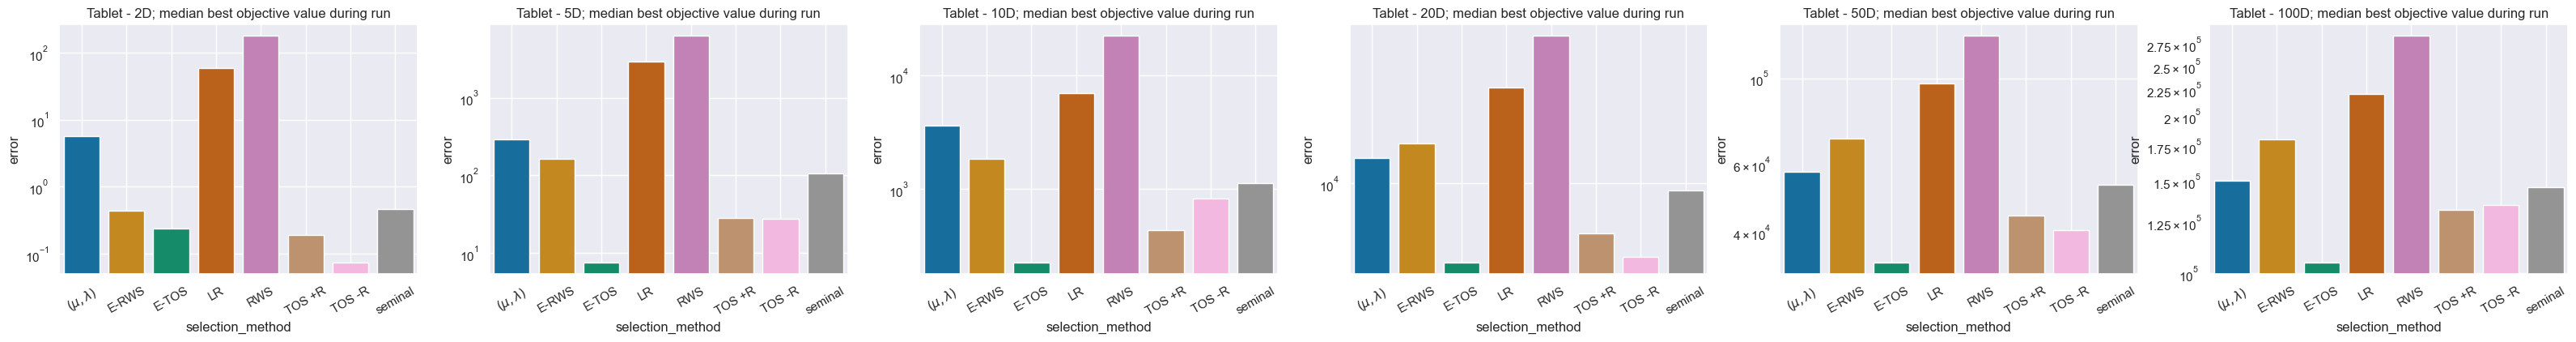

In [6]:
benchmarks = df_nd.benchmark.unique()
i = 0
for benchmark in benchmarks:
    data = df_nd[df_nd['benchmark'] == benchmark]
    dimensions = data.dimensions.unique()
    fig, axes =plt.subplots(1,len(dimensions), figsize=(40,4))
    plot_data = data.groupby(['selection_method', 'dimensions']).median().reset_index()[['selection_method','error','dimensions']]
    i = 0
    for dim in dimensions:
        
        ax = sns.barplot(x="selection_method", y="error", data=plot_data[plot_data.dimensions == dim], ax=axes[i])
        ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
        ax.set_title(f'{benchmark} - {dim}D; median best objective value during run')

        ax.set_yscale("log")
        ax.grid()
        ax.yaxis.grid(True)
        
        i+=1
    plt.show()
    plt.savefig(f'PPA/notebooks/images/barcharts_per_benchmark/{benchmark}.png',bbox_inches='tight')
        
    

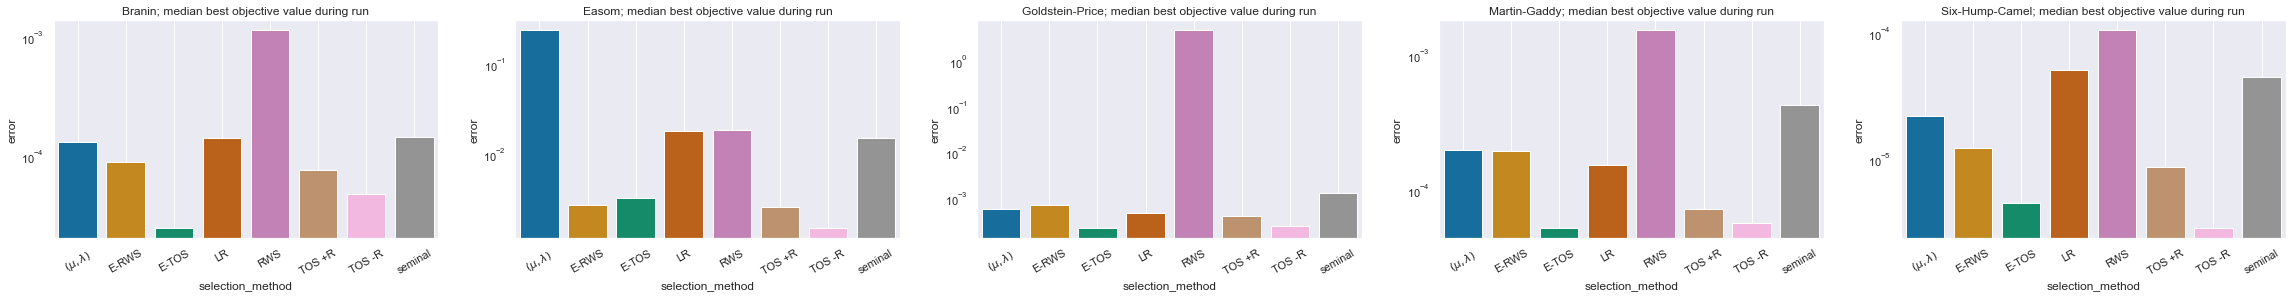

In [7]:
%matplotlib inline

fig, axes =plt.subplots(1,5, figsize=(40,4))
# fig.subplots_adjust(hspace=0.6)

benchmarks = df_2d.benchmark.unique()

i = 0
sns.set_palette("colorblind")
for benchmark in benchmarks:
    
    plot_data = df_2d[df_2d['benchmark'] == benchmark]
    optimum = plot_data['theoretical_optimum'][:1].item()
    plot_data = plot_data.groupby('selection_method').std().reset_index()[['selection_method','error']]
    
    ax = sns.barplot(x="selection_method", y="error", data=plot_data, ax = axes[i])
    ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
    ax.set_title(f'{benchmark}; median best objective value during run')
    ax.grid()
    ax.set_yscale("log")
    i+=1
fig.savefig(f'PPA/notebooks/images/barcharts_per_benchmark/2d-benchmarks.png',bbox_inches='tight')
   

In [8]:
# with open('PPA/notebooks/df_nd2.pickle', 'wb') as handle:
#     pickle.dump(test, handle, protocol=pickle.HIGHEST_PROTOCOL)
# with open('PPA/notebooks/df_nd2.pickle', 'rb') as handle:
#     test = pickle.load(handle)

### Rename and find the lowest and highest values for the heatmap in order to use the same scale for all plots

In [8]:
heatmap_nd_data = df_nd[['selection_method', 'benchmark','dimensions','error']].groupby(['selection_method','benchmark','dimensions']).median().reset_index()
heatmap_nd_data = heatmap_nd_data.replace({"selection_method": renames})
dimensions = heatmap_nd_data.dimensions.unique()


lowest = 100_0000
highest = -100_000
for dim in dimensions:
    magnitude_data = heatmap_nd_data[heatmap_nd_data['dimensions'] == dim]
    magnitude_data = magnitude_data.pivot(index='selection_method', columns='benchmark', values='error') 

    magnitude_data = magnitude_data[magnitude_data.index == 'seminal'].squeeze() / magnitude_data[~(magnitude_data.index == 'seminal')]
    
    potential_low = magnitude_data.min().min()
    potential_high = magnitude_data.max().max()
    if potential_low < lowest:
        lowest = potential_low
        
    if potential_high > highest:
        highest = potential_high
# lowest = math.floor(lowest)
# highest = math.ceil(highest)

In [9]:
#this this i copied from https://stackoverflow.com/questions/48625475/python-shifted-logarithmic-colorbar-white-color-offset-to-center 
class MidPointLogNorm(LogNorm):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        LogNorm.__init__(self,vmin=vmin, vmax=vmax, clip=clip)
        self.midpoint=midpoint
    def __call__(self, value, clip=None):
        x, y = [np.log(self.vmin), np.log(self.midpoint), np.log(self.vmax)], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(np.log(value), x, y))


### Create the heatmap for all dimensions

In [10]:
column_order = ['$(\mu,\lambda)$', 'LR', 'RWS', 'E-RWS', 'TOS +R', 'TOS -R','E-TOS' ]

C:\Users\nieli\miniconda3\envs\ppa_data_vis\lib\site-packages\ipykernel_launcher.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


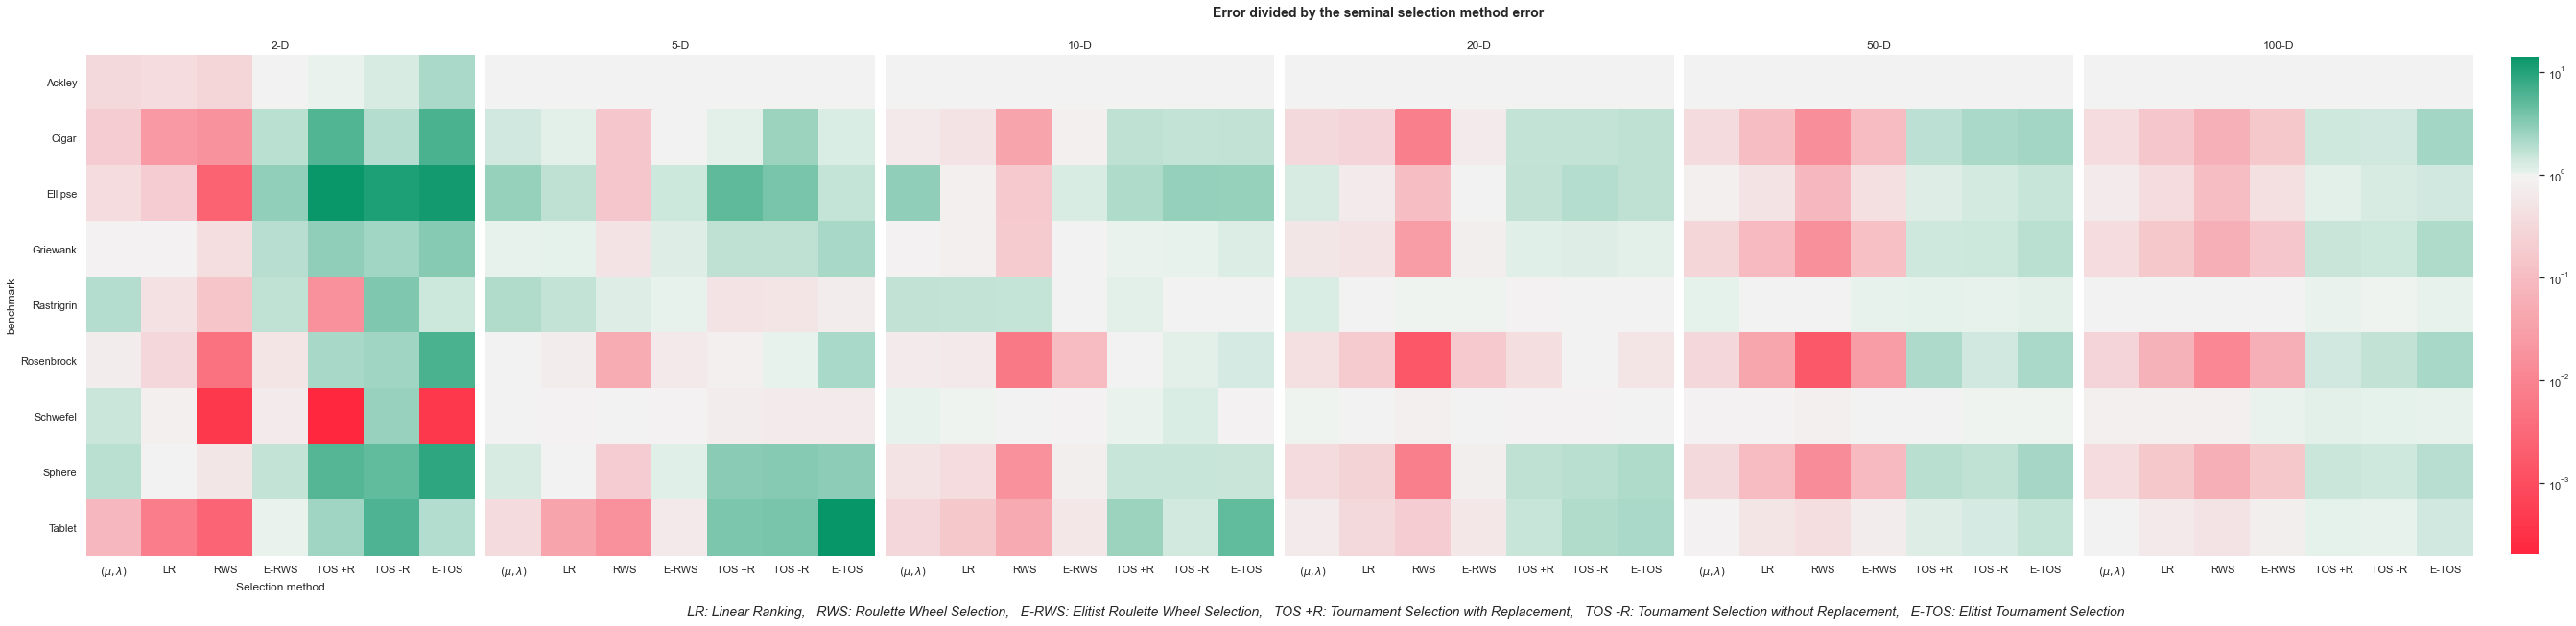

In [11]:
fig, axs = plt.subplots(nrows=1,ncols=len(dimensions), figsize=(40,9))

min_error = heatmap_nd_data.error.min()
max_error = heatmap_nd_data.error.max()

rdgn = sns.diverging_palette(h_neg=10, h_pos=150, s=99, l=55, sep=3, as_cmap=True)

counter =0 
for dim in dimensions:
    
    plot_data = heatmap_nd_data[heatmap_nd_data['dimensions'] == dim]
    
    plot_data = plot_data.pivot(index='selection_method', columns='benchmark', values='error') 

    plot_data = plot_data[plot_data.index == 'seminal'].squeeze() /plot_data
    plot_data = plot_data[~(plot_data.index == 'seminal')]
    plot_data = plot_data.transpose()[column_order]
    
    if counter == 0:
        ax = sns.heatmap(plot_data, ax=axs[counter], norm=MidPointLogNorm(vmin=lowest, vmax=highest, midpoint=1), cmap=rdgn, cbar=False, square=True) #norm=LogNorm(vmin=min_error, vmax=max_error)
#         ax = sns.heatmap(plot_data, ax=axs[counter], cmap='YlGnBu', cbar=False, square=True, vmin=lowest, vmax=highest)
        ax.set_title(f'{dim}-D')
        ax.set_xlabel('Selection method')
        
    elif counter < len(dimensions)-1:
        ax = sns.heatmap(plot_data, ax=axs[counter], norm=MidPointLogNorm(vmin=lowest, vmax=highest, midpoint=1), cmap=rdgn, cbar=False, square=True) #norm=LogNorm(vmin=min_error, vmax=max_error)
#         ax = sns.heatmap(plot_data, ax=axs[counter], cmap='YlGnBu', cbar=False, square=True, vmin=lowest, vmax=highest)
        ax.set(yticklabels=[])
        ax.set_title(f'{dim}-D')
        ax.set_ylabel('') 
        ax.set_xlabel('')
    elif counter >= len(dimensions)-1:
        cbar_ax = fig.add_axes([.91, .1, .01, 0.80]) #[Horizontal coordinate of the lower left corner,  Vertical coordinate of the lower left corner, Width of the subplot,  Height of the subplot]
        ax = sns.heatmap(plot_data, ax=axs[counter], norm=MidPointLogNorm(vmin=lowest, vmax=highest, midpoint=1), cmap=rdgn, square=True, cbar_ax=cbar_ax)#norm=LogNorm(vmin=min_error, vmax=max_error)
#         ax = sns.heatmap(plot_data, ax=axs[counter], cmap='YlGnBu', square=True, cbar_kws={"shrink": 5}, cbar_ax=cbar_ax, vmin=lowest, vmax=highest)
        ax.collections[0].colorbar.ax.yaxis.set_ticks([], minor=True)
        ax.set(yticklabels=[])
        ax.set_title(f'{dim}-D')
        ax.set_ylabel('')
        ax.set_xlabel('')
        
    counter+=1
    
fig.tight_layout(rect=[0, 0, .9, 1])
fig.suptitle('Error divided by the seminal selection method error', fontsize=14, fontweight='bold')
fig.text(0.25, 0,
         'LR: Linear Ranking,   RWS: Roulette Wheel Selection,   E-RWS: Elitist Roulette Wheel Selection,   TOS +R: Tournament Selection with Replacement,   TOS -R: Tournament Selection without Replacement,   E-TOS: Elitist Tournament Selection',
         fontsize=14, style='italic')
plt.savefig('PPA/notebooks/images/heatmap-vs-seminal.png')

plt.show()


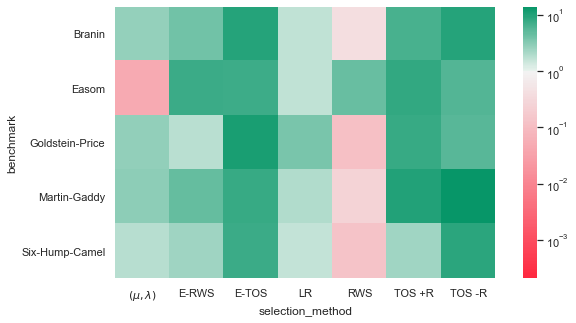

In [12]:
heatmap_2d_data = df_2d[['selection_method', 'benchmark','error']].groupby(['selection_method','benchmark']).median().reset_index()
heatmap_2d_data = heatmap_2d_data.replace({"selection_method": renames})
heatmap_2d_data = heatmap_2d_data.pivot(index='selection_method', columns='benchmark', values='error')
fig, axs = plt.subplots(ncols=1, figsize=(10,5))

heatmap_2d_data = heatmap_2d_data[heatmap_2d_data.index == 'seminal'].squeeze() /heatmap_2d_data
heatmap_2d_data = heatmap_2d_data[~(heatmap_2d_data.index == 'seminal')].transpose()

ax = sns.heatmap(heatmap_2d_data, ax=axs, norm=MidPointLogNorm(vmin=lowest, vmax=highest, midpoint=1), cmap=rdgn, square=True)
ax.collections[0].colorbar.ax.yaxis.set_ticks([], minor=True)

plt.show()

### Making line charts CAN'T USE THESE BECAUSE THE ERROR OVER DIMENSION IS NOT CONTINUES

In [ ]:
# for benchmark in df_nd.benchmark.unique():
#     data = df_nd[df_nd['benchmark'] == benchmark]
#     grouped = data.groupby(['selection_method', 'dimensions']).median().reset_index()

#     for method in grouped.selection_method.unique():
#         plot_data = grouped[grouped.selection_method == method]
#         sns.lineplot(x=plot_data.dimensions,y=plot_data.error,label=method, marker='o')
#     plt.title(f'Error for {benchmark} per dimension')
# #     plt.yscale("log")
#     plt.savefig(f'PPA/notebooks/images/linecharts_per_benchmark/{benchmark}.png', bbox_inches='tight')
#     plt.show()
    
# #     plt.title('test')

### Barcharts comperative

In [13]:
grouped_nd = df_nd.groupby(['benchmark','selection_method', 'dimensions']).median().reset_index()
grouped_2d = df_2d.groupby(['benchmark','selection_method', 'dimensions']).median().reset_index()

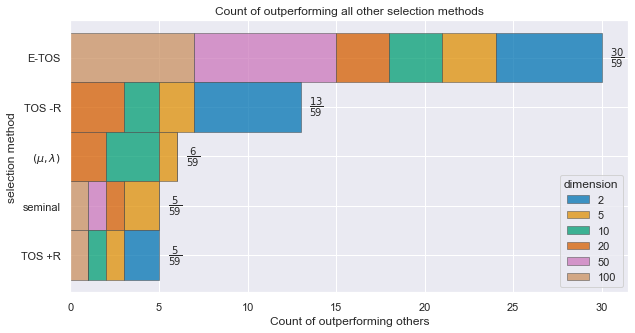

In [14]:
with sns.axes_style("dark"):
    plt.figure(figsize=(10, 5))   
    
    count_df = pd.DataFrame(columns=['selection_method','dimension','counter'])
    
    for benchmark in grouped_nd.benchmark.unique():
        for dimension in grouped_nd.dimensions.unique():
            benchmark_dim_data = grouped_nd[(grouped_nd.benchmark == benchmark) & (grouped_nd.dimensions == dimension)]
            min_id = benchmark_dim_data.error.argmin()
            count_df = count_df.append({"selection_method":benchmark_dim_data.iloc[min_id].selection_method,"dimension":int(dimension),"counter":1}, ignore_index=True)
    
    for benchmark in grouped_2d.benchmark.unique():
        benchmark_2d_data = grouped_2d[(grouped_2d.benchmark == benchmark)]
        min_id = benchmark_2d_data.error.argmin()
        count_df = count_df.append({"selection_method":benchmark_2d_data.iloc[min_id].selection_method,"dimension":int(2),"counter":1}, ignore_index=True)
        
    count_df = count_df.groupby(['selection_method','dimension']).sum().reset_index().sort_values(by=['counter','dimension'],ascending=False)
    g = sns.histplot(count_df,y='selection_method', weights='counter',multiple="stack",hue='dimension',palette="colorblind", edgecolor=".3", linewidth=0.5)
    
    i = 0
    for index,row in count_df.groupby('selection_method').sum().sort_values(by=['counter'],ascending=False).iterrows():

        g.text(row.counter+0.9, abs(0-i), r'$\dfrac{%d}{59}$'%(row.counter), horizontalalignment='center', verticalalignment='center')
        i+=1
        
    plt.grid()
    plt.title('Count of outperforming all other selection methods')
    plt.ylabel('selection method')
    plt.xlabel('Count of outperforming others')
    plt.savefig(f'PPA/notebooks/images/barcharts_per_benchmark/score_per_selection_and_dimension.png', bbox_inches='tight')
    plt.show()

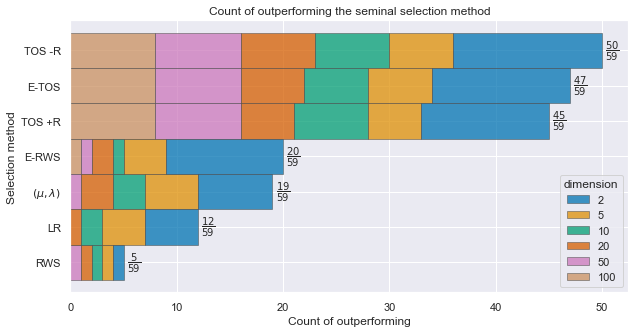

In [16]:
with sns.axes_style("dark"):
    
    plt.figure(figsize=(10, 5))
    data = grouped_nd[~(grouped_nd['selection_method'] == 'seminal')]
    outperforms_df = pd.DataFrame(columns=['selection_method','dimension','counter'])
    
    for benchmark in data.benchmark.unique():
        for dim in data.dimensions.unique():
        
            original_error = grouped_nd[(grouped_nd['selection_method']=='seminal') & (grouped_nd['benchmark']==benchmark) & (grouped_nd['dimensions']==dim)]['error']
            for method in data.selection_method.unique():
                
                selection_method_error = data[(data['selection_method']==method) & (data['benchmark']==benchmark) & (data['dimensions']==dim)]['error']
                if float(original_error) > float(selection_method_error):
                    outperforms_df= outperforms_df.append({"selection_method":method,"dimension":int(dim),"counter":1}, ignore_index=True)
    
    data = grouped_2d[~(grouped_2d['selection_method'] == 'seminal')]
    for benchmark in data.benchmark.unique():
        
        original_error = grouped_2d[(grouped_2d['selection_method']=='seminal') & (grouped_2d['benchmark']==benchmark)]['error']
 
        for method in data.selection_method.unique():
            
            selection_method_error = data[(data['selection_method']==method) & (data['benchmark']==benchmark)]['error']
            if float(original_error) > float(selection_method_error):
                outperforms_df= outperforms_df.append({"selection_method":method,"dimension":int(2),"counter":1}, ignore_index=True)

outperforms_df = outperforms_df.groupby(['selection_method','dimension']).sum().sort_values(by=['counter'],ascending=False)

#used for sorting the data
outperforms_df = outperforms_df.loc[(outperforms_df.groupby('selection_method').sum().sort_values('counter', ascending=False).index.values)].reset_index()


g = sns.histplot(outperforms_df,y='selection_method', weights='counter',multiple="stack",hue='dimension',palette="colorblind", edgecolor=".3", linewidth=0.5)
# print(outperforms_df)
i = 0
for index,row in outperforms_df.groupby('selection_method').sum().sort_values(by=['counter'],ascending=False).iterrows():
    g.text(row.counter+1, abs(0-i), r'$\dfrac{%d}{59}$'%(row.counter), horizontalalignment='center', verticalalignment='center')
    i+=1
    
plt.grid()
plt.title('Count of outperforming the seminal selection method')
plt.ylabel('Selection method')
plt.xlabel('Count of outperforming')
plt.grid()
plt.savefig(f'PPA/notebooks/images/barcharts_per_benchmark/outperforming_seminal_per_selection_and_dimension.png', bbox_inches='tight')
plt.show()

## Heritage Analysis

### Select two methods

In [17]:
folder_name = 'PPA/results/results-2021-06-03_18-58-27'
selection_method_one= 'single_elitist_tournament'
selection_name_one = renames[selection_method_one]

selection_method_two = 'mupluslambda'
selection_name_two = renames[selection_method_two]

benchmark_name = 'Ellipse'
dimensions = 2

benchmark_df = df_nd[(df_nd['benchmark'] == benchmark_name) & (df_nd['selection_method'] == selection_name_one) & (df_nd['dimensions'] == dimensions)]
run_n = benchmark_df[benchmark_df['error']==benchmark_df['error'].quantile(interpolation='nearest')]['run_n']
run_n = 5
s1_results = pickle.load(open(f"{folder_name}/{selection_method_one}-{benchmark_name}{dimensions}Drun-{int(run_n)}.p", "rb"))

benchmark_df = df_nd[(df_nd['benchmark'] == benchmark_name) & (df_nd['selection_method'] == selection_name_two) & (df_nd['dimensions'] == dimensions)]
run_n = benchmark_df[benchmark_df['error']==benchmark_df['error'].quantile(interpolation='nearest')]['run_n']
s2_results = pickle.load(open(f"{folder_name}/{selection_method_two}-{benchmark_name}{dimensions}Drun-{int(run_n)}.p", "rb"))

### Unique individuals per generation

Text(0, 0.5, '# of individuals')

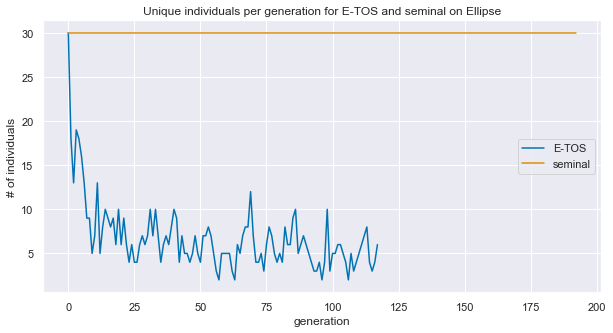

In [18]:
fig, axs = plt.subplots(nrows=1,ncols=1, figsize=(10,5))

s1_indivuals_per_generation = pd.DataFrame(s1_results.heritage.unique_individual_count, columns=['generation', '#individuals'])
s2_indivuals_per_generation = pd.DataFrame(s2_results.heritage.unique_individual_count, columns=['generation', '#individuals'])

sns.lineplot(x=s1_indivuals_per_generation['generation'], y=s1_indivuals_per_generation['#individuals'], ax=axs)
sns.lineplot(x=s2_indivuals_per_generation['generation'], y=s2_indivuals_per_generation['#individuals'], ax=axs)

plt.legend(loc='center right', labels=[selection_name_one, selection_name_two])
plt.title(f'Unique individuals per generation for {selection_name_one} and {selection_name_two} on {s1_results.benchmark_name}')
plt.xlabel('generation')
plt.ylabel('# of individuals')

### Average age per generation

Text(0, 0.5, 'mean age')

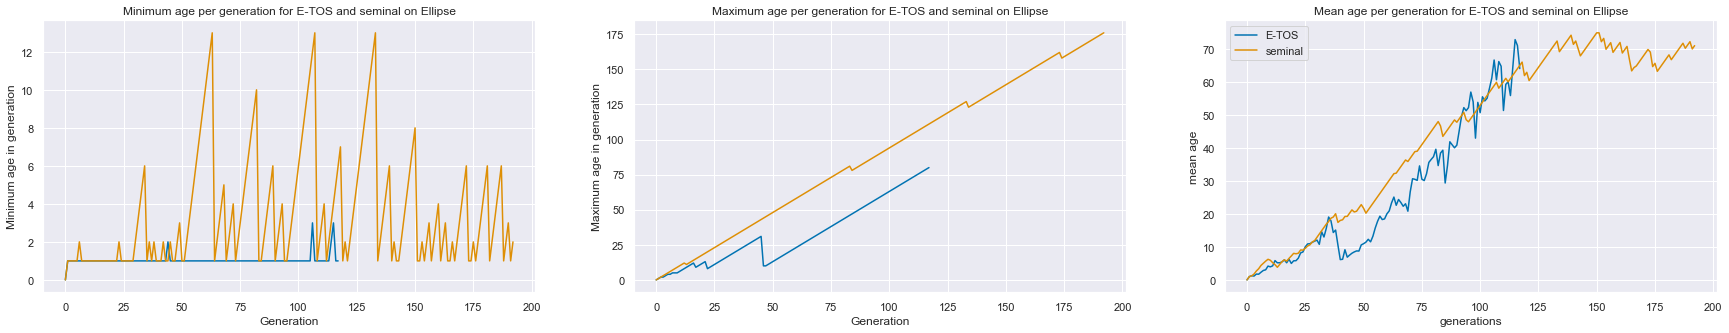

In [19]:
s1_ages_per_generation = []
s1_data = s1_results.heritage.ages_per_generation

for value in s1_data:
    s1_ages_per_generation.append([value,np.min(s1_data[value]), np.max(s1_data[value]), np.mean(s1_data[value])])


s2_ages_per_generation = []
s2_data = s2_results.heritage.ages_per_generation

for value in s2_data:
    s2_ages_per_generation.append([value,np.min(s2_data[value]), np.max(s2_data[value]), np.mean(s2_data[value])])

    
s1_mean_ages_per_generation = pd.DataFrame(s1_ages_per_generation, columns=['generation','min_age','max_age','mean_age'])
s2_mean_ages_per_generation = pd.DataFrame(s2_ages_per_generation, columns=['generation','min_age','max_age','mean_age'])

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 5))
sns.lineplot(x=s1_mean_ages_per_generation['generation'],y=s1_mean_ages_per_generation['min_age'], ax=axs[0])
sns.lineplot(x=s2_mean_ages_per_generation['generation'],y=s2_mean_ages_per_generation['min_age'], ax=axs[0])
axs[0].set(xlabel="Generation", ylabel="Minimum age in generation", title=f'Minimum age per generation for {selection_name_one} and {selection_name_two} on {benchmark_name}')

sns.lineplot(x=s1_mean_ages_per_generation['generation'],y=s1_mean_ages_per_generation['max_age'], ax=axs[1])
sns.lineplot(x=s2_mean_ages_per_generation['generation'],y=s2_mean_ages_per_generation['max_age'], ax=axs[1])
axs[1].set(xlabel="Generation", ylabel="Maximum age in generation", title=f'Maximum age per generation for {selection_name_one} and {selection_name_two} on {benchmark_name}')

sns.lineplot(x=s1_mean_ages_per_generation['generation'],y=s1_mean_ages_per_generation['mean_age'], ax=axs[2])
sns.lineplot(x=s2_mean_ages_per_generation['generation'],y=s2_mean_ages_per_generation['mean_age'], ax=axs[2])
axs[2].set(xlabel="Generation", ylabel="Mean age in generation", title=f'Mean age per generation for {selection_name_one} and {selection_name_two} on {benchmark_name}')


plt.legend(loc='upper left', labels=[selection_name_one, selection_name_two])
plt.title(f'Mean age per generation for {selection_name_one} and {selection_name_two} on {benchmark_name}')
plt.xlabel('generations')
plt.ylabel('mean age')

In [20]:
s2_mean_ages_per_generation['min_age'][150:175]

150    8
151    1
152    1
153    2
154    1
155    2
156    3
157    1
158    2
159    3
160    4
161    1
162    2
163    3
164    1
165    1
166    2
167    1
168    2
169    3
170    4
171    5
172    6
173    1
174    1
Name: min_age, dtype: int64

What we see here is pure heritage analysis. We find in the first graph a remarkable pattern, where the seminal PPA selection has spikes up to 12 generations of minimum age, indicating that no offspring is selected during 12 generations, thus not improving, incomparison to the elitist Tournament Selection method which has a continuously minimum age of 1, indicating that every generation, a new individual is accepted. 

### Age histogram

[Text(0.5, 0, 'Occurences'),
 Text(0, 0.5, 'Age'),
 Text(0.5, 1.0, 'Histogram of age occurences for seminal on Ellipse')]

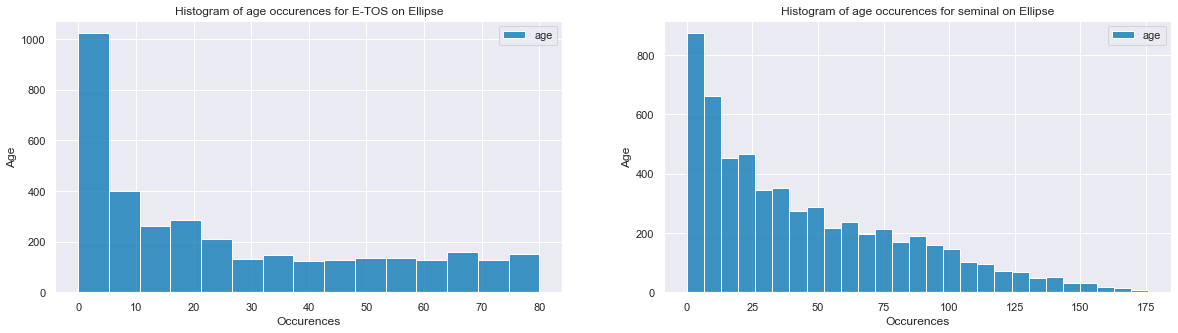

In [21]:
s1_ages = pd.DataFrame(np.array(list(s1_results.heritage.ages_per_generation.values())).reshape((-1)), columns=['age'])
s2_ages = pd.DataFrame(np.array(list(s2_results.heritage.ages_per_generation.values())).reshape((-1)), columns=['age'])
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

sns.histplot(s1_ages, ax=axs[0])
axs[0].set(xlabel="Occurences", ylabel="Age", title=f'Histogram of age occurences for {selection_name_one} on {benchmark_name}')

sns.histplot(s2_ages, ax=axs[1])
axs[1].set(xlabel="Occurences", ylabel="Age", title=f'Histogram of age occurences for {selection_name_two} on {benchmark_name}')


### Lineage similarities

In [22]:
s1_results.parent_population[0].parents

[{'id': 21,
  'objective_value': None,
  'inputs': [15.913400004028901, -18.01483381702029]},
 {'id': 89,
  'objective_value': 4761.156266183341,
  'inputs': [-16.23025308335174, 0.6706515601289311]},
 {'id': 214,
  'objective_value': 12859.295079938855,
  'inputs': [-17.983447924786105, -1.119637918287665]},
 {'id': 271,
  'objective_value': 451.1639950977291,
  'inputs': [-7.932621306688867, 0.19703743662116469]},
 {'id': 333,
  'objective_value': 51.18787289315474,
  'inputs': [-5.03449114381673, 0.050834802857870565]},
 {'id': 716,
  'objective_value': 8.10674104261234,
  'inputs': [-2.5219931446171646, 0.01321473276731832]},
 {'id': 1191,
  'objective_value': 2.5211576229473676,
  'inputs': [0.8698268174648982, -0.013283670165154863]},
 {'id': 3206,
  'objective_value': 0.10260060084849135,
  'inputs': [-0.1631774239700805, 0.002756333237382228]},
 {'id': 10066,
  'objective_value': 8853.1403120809,
  'inputs': [0.5233960664608759, -0.9408967195520724]}]

In [23]:
# s1_parents = [i.id for i in s1_results.parent_population.parents]
s1_parents = []
for individual in s1_results.parent_population:
    individual_parent_ids = []
    for parents in individual.parents:
        individual_parent_ids.append(parents['id'])
    s1_parents.append(individual_parent_ids)
    
s2_parents = []
for individual in s2_results.parent_population:
    individual_parent_ids = []
    for parents in individual.parents:
        individual_parent_ids.append(parents['id'])
    s2_parents.append(individual_parent_ids)

### Manual description of similarities

why are most of the parents the same? well, at the end, when some individual outperforms the rest, it generates continuously more offspring while in a better place. If that individual is better, it has the same parents as its parent.
Every time a individual is kicked out the new population, his whole heritage is lost.

In [24]:
s1_parents.sort()
s1_parents
# tot en met 2985 hebben ze precies de zelfde voor ouders
# na 2985 loopt het uit elkaar met 4 verschillende individuen met alle 4, verschillende voor ouders

[[21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 214, 271, 333, 716, 1191, 3206],
 [21, 89, 2

In [25]:
s2_parents.sort()
s2_parents
# tot en met 168 hebben ze precies de zelfde voor ouders
# tot en met 2575 hebben 28 individuals dezelfde voor ouders
# tot en met 2893 hebben 22 indv. dezelfde voor ouders
# tot en met 4541 hebben 21 indv. dezelfde voor ouders
# na 4541 loopt het uit elkaar met maximaal 3 individuen met precies dezelfde voor ouders

[[25, 81, 122, 188, 399, 976],
 [25, 81, 122, 188, 399, 976, 3119],
 [25, 81, 122, 188, 399, 976, 3119, 4092],
 [25, 81, 122, 188, 399, 976, 3119, 4751],
 [25, 81, 122, 188, 399, 976, 3119, 4751, 5081],
 [25, 81, 122, 188, 399, 976, 3119, 4803],
 [25, 81, 122, 188, 399, 976, 3119, 5268],
 [25, 81, 122, 188, 399, 976, 3119, 5270],
 [25, 81, 122, 188, 399, 976, 3119, 5270, 6482],
 [25, 81, 122, 188, 399, 976, 3119, 5270, 6482, 7094],
 [25, 81, 122, 188, 399, 976, 3119, 5270, 6482, 7094, 7360],
 [25, 81, 122, 188, 399, 976, 3119, 5270, 6482, 7094, 7360, 7452],
 [25, 81, 122, 188, 399, 976, 3119, 5270, 6482, 7094, 7360, 8029],
 [25, 81, 122, 188, 399, 976, 3119, 5270, 6482, 7094, 7360, 8029, 9026],
 [25, 81, 122, 188, 399, 976, 3119, 5270, 6482, 7094, 7360, 8029, 9771],
 [25, 81, 122, 188, 399, 976, 3119, 5270, 6482, 7094, 7360, 8029, 9929],
 [25, 81, 122, 188, 399, 976, 3119, 5270, 6482, 7094, 7360, 8565],
 [25, 81, 122, 188, 399, 976, 3119, 5270, 6482, 7094, 7360, 8984],
 [25, 81, 122, 1

In [122]:
#collect last 30 population and their parents

#compare the parent arrays

# display the median fitness of the ancestors

### Boxplots of fitness per generation

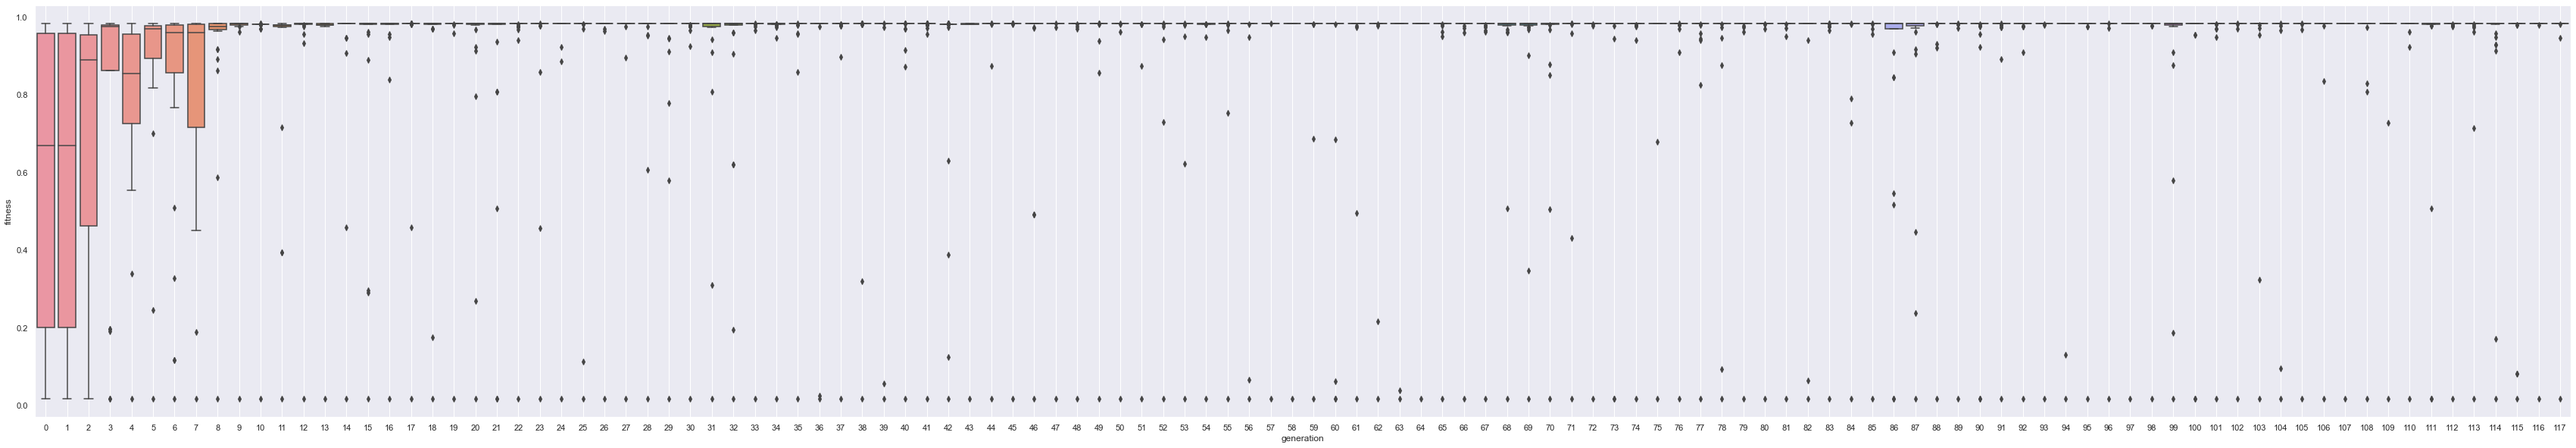

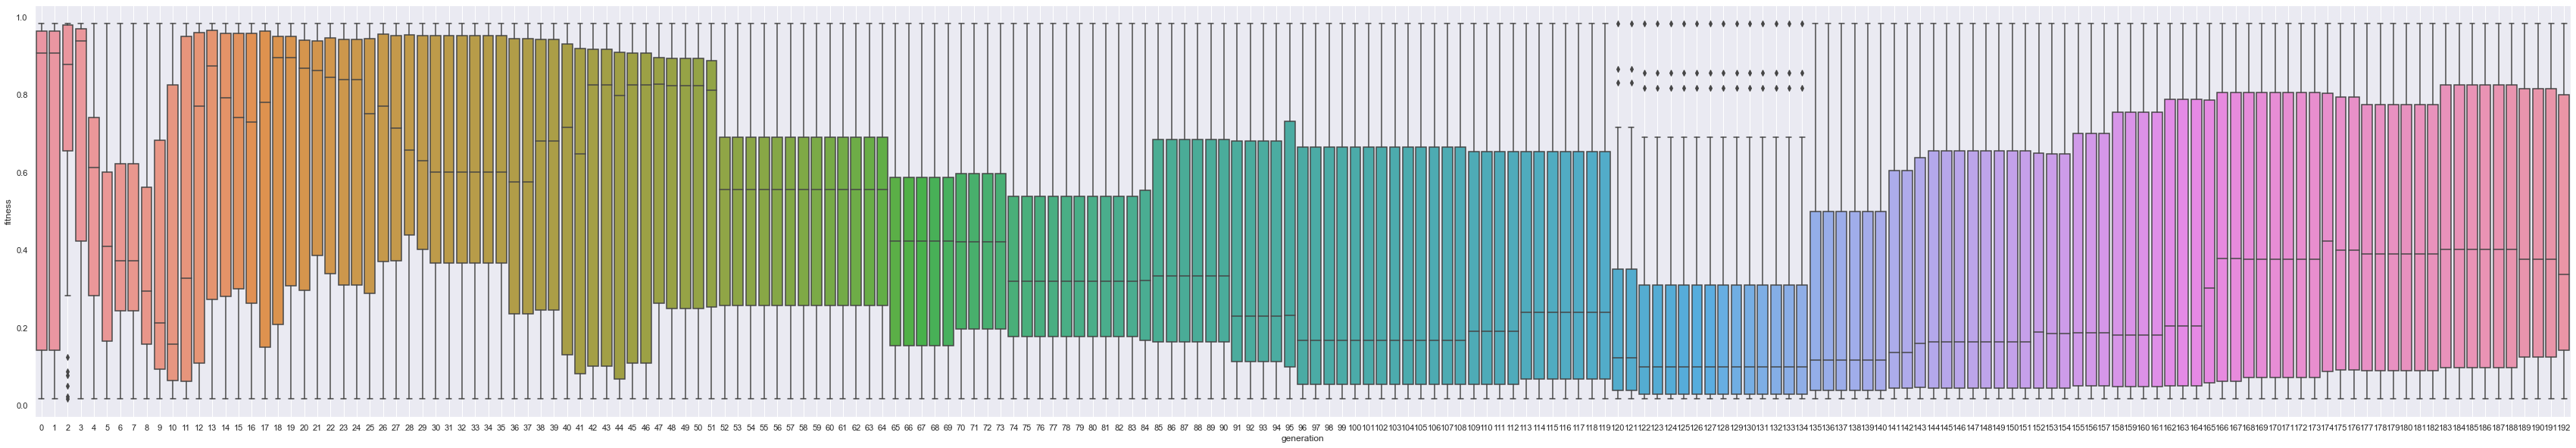

In [26]:
s1_data = s1_results.heritage.ranks_per_generation
s1_df = pd.DataFrame(columns=['id','generation','rank','fitness'])
generations = len(s1_data)

for g in s1_data:
    for key, row in g.items():
        for item in row:
            item['generation'] = key     
            s1_df = s1_df.append(item, ignore_index=True)

s1_df = s1_df.astype({'generation': int})
plt.figure(figsize=(60, 10))
ax = sns.boxplot(x='generation', y='fitness', data=s1_df)
plt.grid()
plt.show()


s2_data = s2_results.heritage.ranks_per_generation
s2_df = pd.DataFrame(columns=['id','generation','rank','fitness'])
generations = len(s2_data)

for g in s2_data:
    for key, row in g.items():
        for item in row:
            item['generation'] = key     
            s2_df = s2_df.append(item, ignore_index=True)

s2_df = s2_df.astype({'generation': int})
plt.figure(figsize=(60, 10))
ax = sns.boxplot(x='generation', y='fitness', data=s2_df)
plt.grid()
plt.show()
    

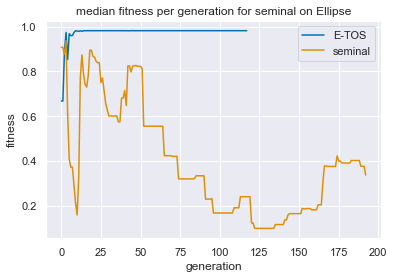

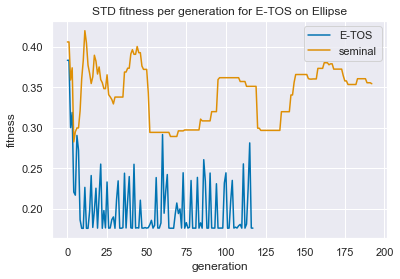

In [27]:
s1_median_df = s1_df.groupby('generation').median()
sns.lineplot(x='generation', y='fitness',data=s1_median_df, label=selection_name_one).set_title(f'median fitness per generation for {selection_name_one} on {benchmark_name}')

s2_median_df = s2_df.groupby('generation').median()
sns.lineplot(x='generation', y='fitness',data=s2_median_df, label=selection_name_two).set_title(f'median fitness per generation for {selection_name_two} on {benchmark_name}')
plt.show()

s1_std_df = s1_df.groupby('generation').std()
sns.lineplot(x='generation', y='fitness',data=s1_std_df, label=selection_name_one).set_title(f'STD fitness per generation for {selection_name_one} on {benchmark_name}')

s2_std_df = s2_df.groupby('generation').std()
sns.lineplot(x='generation', y='fitness',data=s2_std_df, label=selection_name_two).set_title(f'STD fitness per generation for {selection_name_one} on {benchmark_name}')
plt.show()

In [33]:
s1_oc_df

,generation,offspring_len
0,0,0
1,1,49
2,2,71
3,3,89
4,4,66
...,...,...
113,113,92
114,114,79
115,115,92
116,116,94


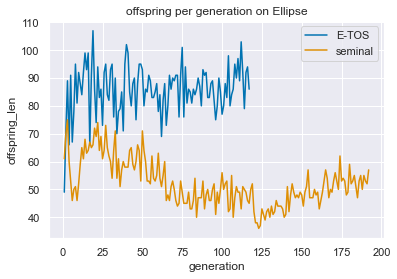

In [39]:
s1_oc_df = pd.DataFrame(s1_results.heritage.offspring_per_generation)
sns.lineplot(x='generation',y='offspring_len',data=s1_oc_df[1:], label=selection_name_one).set_title(f'offspring per generation on {benchmark_name}')

s2_oc_df = pd.DataFrame(s2_results.heritage.offspring_per_generation)
sns.lineplot(x='generation',y='offspring_len',data=s2_oc_df[1:], label=selection_name_two).set_title(f'offspring per generation on {benchmark_name}')
plt.show()

### Best objective value during run

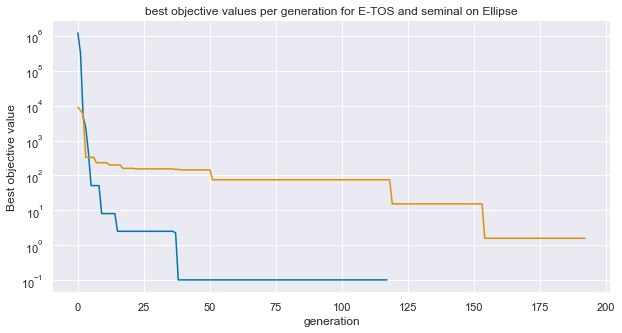

In [28]:
s1_results.heritage.best_individual_in_generation
s1_best_individual_data = []
for b in s1_results.heritage.best_individual_in_generation:
    s1_best_individual_data.append([b[1], b[0].objective_value])
s1_best_individual_data = pd.DataFrame(s1_best_individual_data, columns=['generation','obj_val'])

s2_results.heritage.best_individual_in_generation
s2_best_individual_data = []
for b in s2_results.heritage.best_individual_in_generation:
    s2_best_individual_data.append([b[1], b[0].objective_value])
s2_best_individual_data = pd.DataFrame(s2_best_individual_data, columns=['generation','obj_val'])

plt.figure(figsize=(10, 5))
sns.lineplot(x=s1_best_individual_data.generation, y=s1_best_individual_data.obj_val)
sns.lineplot(x=s2_best_individual_data.generation, y=s2_best_individual_data.obj_val)
plt.title(f'best objective values per generation for {selection_name_one} and {selection_name_two} on {benchmark_name}')
plt.ylabel('Best objective value')
plt.yscale("log")
plt.show()

In [19]:
# import collections
# import json

# def construct_trees_by_TingYu(edges):
#     """Given a list of edges [child, parent], return trees. """
#     trees = collections.defaultdict(dict)

#     for child, parent in edges:
#         trees[parent][child] = trees[child]

#     # Find roots
#     children, parents = zip(*edges)
#     roots = set(parents).difference(children)

#     return {root: trees[root] for root in roots}

# if __name__ == '__main__':
# #     edges = [[0, 6], [17, 5], [2, 7], [4, 14], [12, 9], [15, 5], [11, 1], [14, 8], [16, 6], [5, 1], [10, 7], [6, 10], [8, 2], [13, 1], [1, 12], [7, 1], [3, 2], [19, 12], [18, 19]]
#     edges = [[8,5],[7,5],[4,2],[5,2],[6,3],[2,1],[3,1]]
# #     edges = test.heritage.relations
#     results = json.dumps(construct_trees_by_TingYu(edges), indent=1)
#     print(results)
# #     with open('PPA/notebooks/test4.json', 'w') as outfile:
# #         json.dump(results, outfile)

### Graphical drawing

In [125]:
# try:
#     test = pickle.load(open(r"PPA/results/test/mc-test.p", "rb"))
selection_method= 'tournament'
selection_name = renames[selection_method]
benchmark_name = 'Tablet'
dimensions = 2
benchmark_df = df_nd[(df_nd['benchmark'] == benchmark_name) & (df_nd['selection_method'] == selection_name) & (df_nd['dimensions'] == dimensions)]
run_n = benchmark_df[benchmark_df['error']==benchmark_df['error'].quantile(interpolation='nearest')]['run_n']

test = pickle.load(open(f"PPA/results/results-2021-06-03_18-58-27/{selection_method}-{benchmark_name}{dimensions}Drun-{int(run_n)}.p", "rb"))
test = pickle.load(open(f"PPA/results/test/mc-test.p", "rb"))

# selection_method2 = 'mupluslambda'
# benchmark_name2 = 'Tablet'
# dimensions2 = 2
# benchmark_df2 = df_nd[(df_nd['benchmark'] == benchmark_name2) & (df_nd['selection_method'] == selection_method2) & (df_nd['dimensions'] == dimensions2)]
# run_n2 = benchmark_df2[benchmark_df2['error']==benchmark_df2['error'].quantile(interpolation='nearest')]['run_n']
# test2 = pickle.load(open(f"PPA/results/results-2021-05-19_13-52-40/{selection_method2}-{benchmark_name2}{dimensions2}Drun-{int(run_n2)}.p", "rb"))

# except Exception as e:
#     print(e) # 


In [249]:
#load the data in an edge dataframe
edge_df = pd.DataFrame(test.heritage.relations, columns=['source','target','gen'])
temp = edge_df.copy()
edge_df['source'] = edge_df['target']
edge_df['target'] = temp['source']
edge_df.loc[edge_df['source'] == -1, 'source'] = 0
edge_df['edge_color'] = "grey"

# edge_df = edge_df[edge_df.gen.isin(np.arange(0,20,1))]

In [250]:
parent_ids = []
for individual in test.parent_population:
    for parent in individual.parents:
        parent_ids.append(parent['id'])
edge_df.loc[edge_df["target"].isin(parent_ids),'edge_color'] = "red"


In [142]:
edge_df.to_csv('PPA/notebooks/edge_test.csv', index=False)

In [192]:
from graphviz import Digraph
from graphviz import *

In [251]:
u = Digraph('unix', filename='PPA/notebooks/test/test-unix2.gv',
            node_attr={'color': 'lightblue2', 'style': 'filled'}, graph_attr={'rankdir':"TB"})
u.attr(size='6,6')

# u.edge(f'{row["source"]}', f'{row["target"]}')

edge_df = edge_df.astype({"source": str, "target": str})
u.node("0")

for gen in edge_df.gen.unique():
    
    with u.subgraph() as s:
        s.attr(rank='same')
        counter = 0
        for i,row in edge_df[edge_df['gen'] == gen].iterrows():
            s.node(row['target'])
            counter+=1
            
for i, row in edge_df.iterrows():
    u.edge(row['source'], row['target'])
#     edge_df[edge_df['gen'] == gen].target.values
#     u.add_subgraph([edge_df[edge_df['gen'] == gen].target.values],name=f's-gen-{gen}').graph_attr['rank']='same'
    
#  for i, row in edge_df[edge_df['gen'] == gen].iterrows():
#             s.edge(f'{row["source"]}', f'{row["target"]}')

u.view()

'PPA/notebooks/test\\test-unix2.gv.pdf'

In [174]:
edge_df[edge_df['target'] == "5716"]

,source,target,gen,edge_color
368,5583,5716,68,grey


In [126]:
d = Digraph(filename='PPA/notebooks/test/rank_same.gv')

# with d.subgraph() as s:
#     s.attr(rank='same')
#     s.node('A')
#     s.node('X')

# d.node('C')


    
test = [['A','X'],['B','D','Y']]
for i in [0,1]:
    with d.subgraph() as s:
        s.attr(rank='same')
        for n in test[i]:
            s.node(n)
rels = [['A', 'B'],['A', 'C'],['C','D'] , ['X','Y']]
for r in rels:
    d.edge(r[0],r[1])
# d.edge('A','B') 
# d.edge('A','C')
# d.edges(['CD', 'XY'])

d.view()

'PPA/notebooks/test\\rank_same.gv.pdf'

In [124]:
r[0]

['A', 'B']

In [ ]:
test = [['A', 'B'],['A', 'C'],['C','D']],
        [['X','Y']]

In [ ]:
for gen in edge_df.gen.unique():
    print(edge_df[edge_df['gen'] == gen].target.values)

### Start the drawing of graph

In [225]:
g = igraph.Graph.TupleList(edge_df.itertuples(index=False), directed=True, weights=False)
# g.vs["label"] = g.vs["name"]
# g.es["color"] = "lightgrey" #color of edges
g.es["color"] = edge_df['edge_color']
g.es["font"] = 1
g.vs["color"] = "blue" #color of the vertixes (the dots)

#load the id's of the final population
final_individuals_id = [i.id for i in test.parent_population]
final_individuals_objectives = [round(i.objective_value,4) for i in test.parent_population]

final_individuals_verticex = g.vs.select(name_in=final_individuals_id)
final_individuals_verticex['color'] = 'green'
final_individuals_verticex['vertex_size'] = 50
final_individuals_verticex['label'] = final_individuals_objectives

# plot(g, layout = layout)
# good layouts: layout_lgl() layout_reingold_tilford_circular

layout = g.layout_reingold_tilford(root=0)
_ = igraph.plot(g, layout=layout, 
     edge_arrow_size=0.2, 
     vertex_label_cex=0,  
#      vertex_label_family="Arial",  
#      vertex_label_font=50, 
     vertex_shape="circle", 
     vertex_size=5, 
     vertex_label_color="red",  
     edge_width=0.5,
     rescale=False,
     bbox=(5000,5000), target='PPA/notebooks/test6.png')
print('done')
#  edge.arrow.size=0.5, vertex.label.cex=0.75, vertex.label.family="Helvetica", vertex.label.font=2, vertex.shape="circle", vertex.size=1, vertex.label.color="black",  edge.width=0.5

done


## Some heritage plots

In [55]:
test = pickle.load(open(f"PPA/results/test/mc-test.p", "rb"))

Text(0, 0.5, 'mean age')

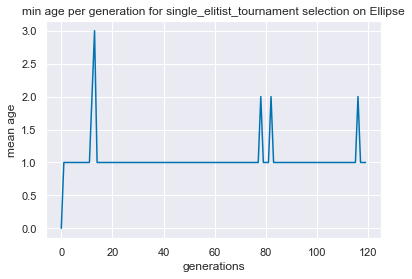

In [230]:
mean_ages_per_generation = []
data = test.heritage.ages_per_generation
i = 0
for value in data:
    mean_ages_per_generation.append([value,np.min(data[value])])
    i+=1
mean_ages_per_generation = pd.DataFrame(mean_ages_per_generation, columns=['generation','min_age'])
plt.plot(mean_ages_per_generation['generation'],mean_ages_per_generation['min_age'])
plt.title(f'min age per generation for {test.survivor_selection_name} selection on {test.benchmark_name}')
plt.xlabel('generations')
plt.ylabel('mean age')

Text(0, 0.5, 'max age')

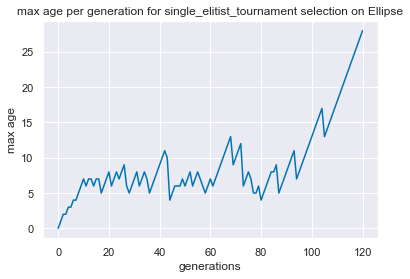

In [222]:
mean_ages_per_generation = []
data = test.heritage.ages_per_generation
i = 0
for value in data:
    mean_ages_per_generation.append([value,np.max(data[value])])
    i+=1
mean_ages_per_generation = pd.DataFrame(mean_ages_per_generation, columns=['generation','max_age'])
plt.plot(mean_ages_per_generation['generation'],mean_ages_per_generation['max_age'])
plt.title(f'max age per generation for {test.survivor_selection_name} selection on {test.benchmark_name}')
plt.xlabel('generations')
plt.ylabel('max age')

In [221]:
mean_ages_per_generation.iloc[120]

generation    120
max_age        28
Name: 120, dtype: int64

In [209]:
x = [1,2,3,4]
y = [5,6]
if not any(element in x for element in y):
    print('ja')

ja


In [81]:
df = pd.DataFrame(columns=['id','generation','rank','fitness'])

In [82]:
data = test.heritage.ranks_per_generation
df = pd.DataFrame(columns=['id','generation','rank','fitness'])
generations = len(data)

for g in data:
    for key, row in g.items():
        for item in row:
            item['generation'] = key     
            df = df.append(item, ignore_index=True)

plt.figure(figsize=(60, 10))
ax = sns.boxplot(x='generation', y='fitness', data=df)
plt.grid()
    

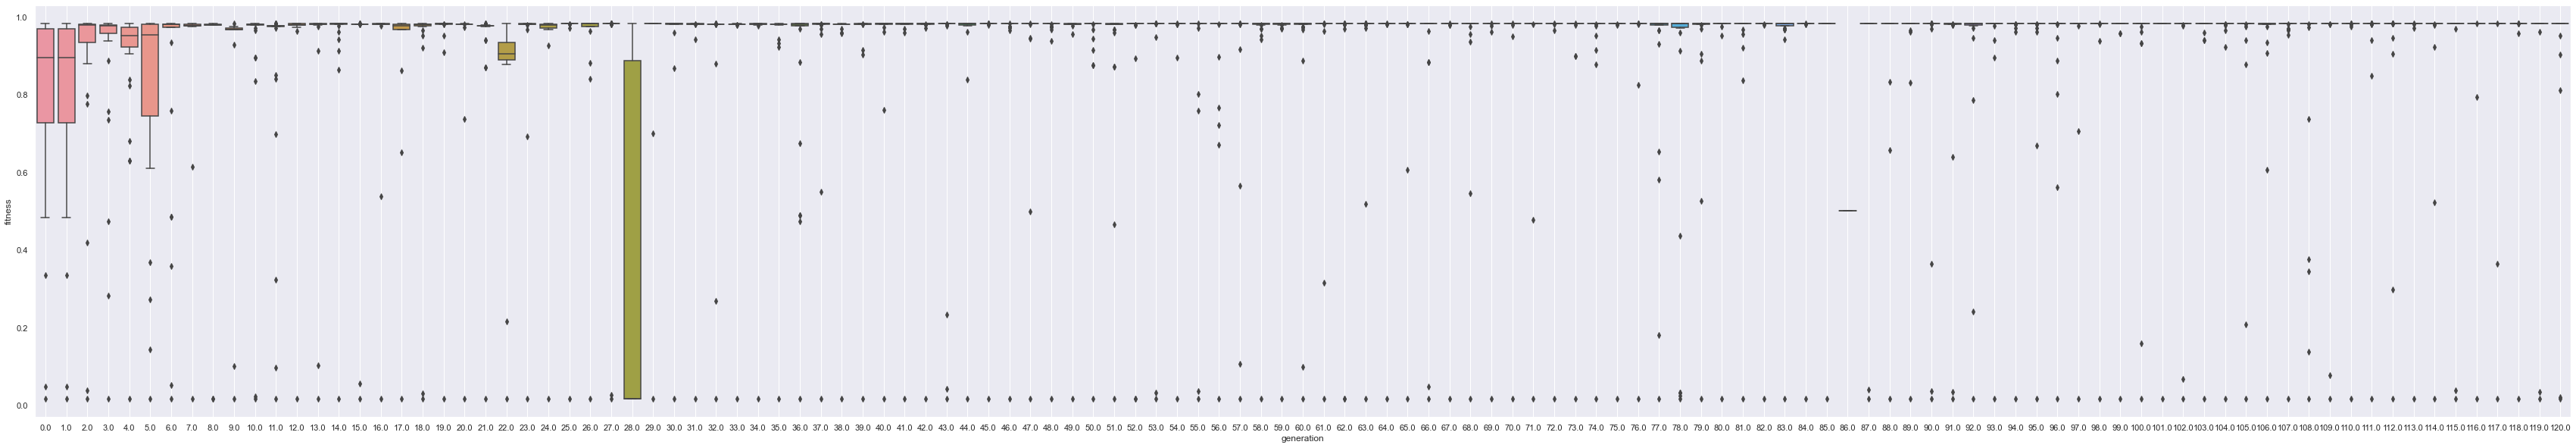

### individuals per generation

Text(0, 0.5, '# of individuals')

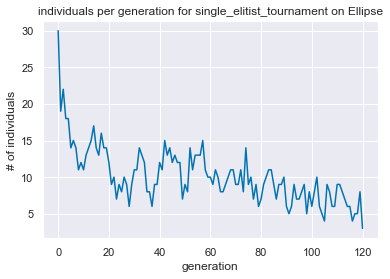

In [223]:
indivuals_per_generation = pd.DataFrame(test.heritage.unique_individual_count, columns=['generation', '#individuals'])
plt.plot(indivuals_per_generation['generation'], indivuals_per_generation['#individuals'])
plt.title(f'individuals per generation for {test.survivor_selection_name} on {test.benchmark_name}')
plt.xlabel('generation')
plt.ylabel('# of individuals')

### Average age per generation

Text(0, 0.5, 'mean age')

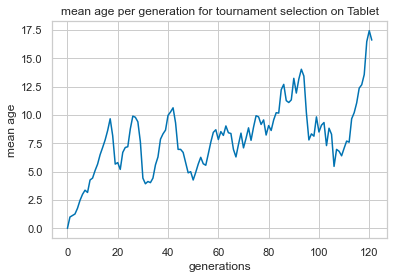

In [89]:
mean_ages_per_generation = []
data = test.heritage.ages_per_generation
i = 0
for value in data:
    mean_ages_per_generation.append([value,np.mean(data[value])])
    i+=1
mean_ages_per_generation = pd.DataFrame(mean_ages_per_generation, columns=['generation','mean_age'])
plt.plot(mean_ages_per_generation['generation'],mean_ages_per_generation['mean_age'])
plt.title(f'mean age per generation for {test.survivor_selection_name} selection on {test.benchmark_name}')
plt.xlabel('generations')
plt.ylabel('mean age')

Text(0, 0.5, 'mean age')

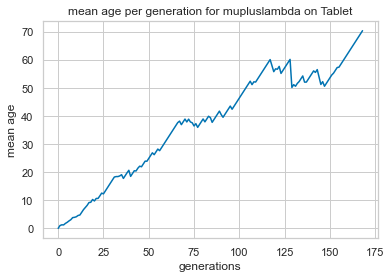

In [132]:
mean_ages_per_generation = []
data = test.heritage.ages_per_generation
i = 0
for value in data:
    mean_ages_per_generation.append([value,np.mean(data[value])])
    i+=1
mean_ages_per_generation = pd.DataFrame(mean_ages_per_generation, columns=['generation','mean_age'])
plt.plot(mean_ages_per_generation['generation'],mean_ages_per_generation['mean_age'])
plt.title(f'mean age per generation for {test.survivor_selection_name} on {test.benchmark_name}')
plt.xlabel('generations')
plt.ylabel('mean age')

In [30]:
test.heritage.ranks_per_generation

NameError: name 'test' is not defined